In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from bs4 import BeautifulSoup
import re

In [8]:
df = pd.read_csv("questions.csv")

In [9]:
new_df.dropna(inplace=True)

In [10]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [13]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

is_duplicate
0    63.074876
1    36.925124
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

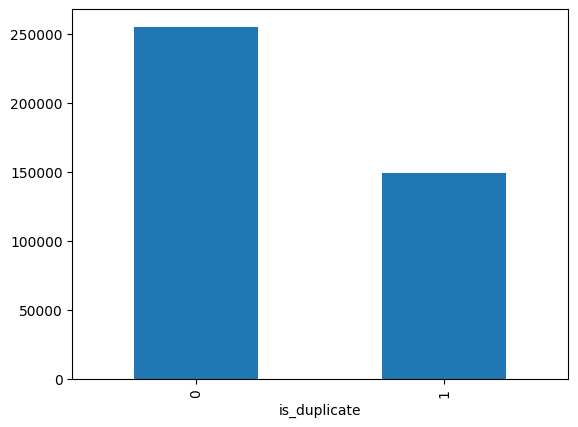

In [12]:
print(new_df['is_duplicate'].value_counts()*100/new_df.shape[0])
new_df['is_duplicate'].value_counts().plot(kind = 'bar')

In [80]:
# removing punctuations and converting to lower_text() and html tags
new_df['question1'] = new_df['question1'].str.lower()
new_df['question2'] = new_df['question2'].str.lower()

import string 
exclude = string.punctuation

def rem_punct(text):
    return text.translate(str.maketrans('','',exclude))

new_df['question1']=new_df['question1'].apply(rem_punct)
new_df['question2']=new_df['question2'].apply(rem_punct)

def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

new_df['question1']=new_df['question1'].apply(remove_html_tags)
new_df['question2']=new_df['question2'].apply(remove_html_tags)

In [81]:
import re
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    
    return q

In [82]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [83]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0
1,1,3,4,what is the story of kohinoor kohinoor diamond,what would happen if the indian government sto...,0
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math2324math is divide...,0
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0


In [84]:
#2) 

In [85]:
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# tokenizer1 = Tokenizer()
# tokenizer1.fit_on_texts(new_df['question1'] + " " + new_df['question2'])


In [86]:
# text1_sequences = tokenizer1.texts_to_sequences(new_df['question1'])
# text2_sequences = tokenizer1.texts_to_sequences(new_df['question2'])

In [87]:
# X1 = pad_sequences(text1_sequences, padding='post', maxlen=50)
# X2 = pad_sequences(text2_sequences, padding='post', maxlen=50)

In [88]:
# y = new_df['is_duplicate'].values

In [89]:
# length = len(tokenizer1.word_index)

In [90]:
# import numpy as np

# # Combine the two sequences into one feature vector, such as by concatenating the padded sequences
# X_combined = np.concatenate([X1, X2], axis=1)
# X_combined.shape

In [91]:
# from keras.datasets import imdb
# from keras import Sequential
# from keras.layers import Dense, SimpleRNN, Embedding, Flatten, LSTM
# from sklearn.utils import compute_class_weight

# class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
# class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# model = Sequential()
# model.add(Embedding(input_dim=length+1, output_dim=X_combined.shape[1]))
# model.add(LSTM(32, return_sequences=False))
# model.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_combined, y, epochs=5, validation_split=0.5, class_weight=class_weight_dict)


In [92]:
# X_combined.shape

In [93]:
# k = 501
# [new_df['question1'][k],new_df['question2'][k],new_df['is_duplicate'][k]]

In [94]:

# a = ["what is your name"]
# b = ["hey what is your name"]
		
# a = tokenizer1.texts_to_sequences(a)
# b = tokenizer1.texts_to_sequences(b)
# a = np.array(a)
# b = np.array(b)
# print(a)
# print(b)
# a = pad_sequences(a, padding='post', maxlen=50)
# b = pad_sequences(b, padding='post', maxlen=50)
# x_combined = np.concatenate([a,b], axis = 1)
# x_combined.shape

In [95]:
# model.predict(x_combined)

In [96]:
# import pickle 

In [97]:
# with open('lstm_model.pkl', 'wb') as file:
#     pickle.dump(model, file)

In [98]:
# adding simple features
#1)
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

#2)
new_df['q1_wordcount'] = new_df['question1'].str.split().str.len()
new_df['q2_wordcount'] = new_df['question2'].str.split().str.len()

In [99]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_wordcount,q2_wordcount
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12
1,1,3,4,what is the story of kohinoor kohinoor diamond,what would happen if the indian government sto...,0,46,83,8,13
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math2324math is divide...,0,48,55,11,9
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,73,38,13,7


In [100]:
#3)
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_wordcount,q2_wordcount,word_common
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,11
1,1,3,4,what is the story of kohinoor kohinoor diamond,what would happen if the indian government sto...,0,46,83,8,13,4
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,4
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math2324math is divide...,0,48,55,11,9,0
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,73,38,13,7,4


In [101]:
#4)
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_wordcount,q2_wordcount,word_common,word_total
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,11,23
1,1,3,4,what is the story of kohinoor kohinoor diamond,what would happen if the indian government sto...,0,46,83,8,13,4,18
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,4,24
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math2324math is divide...,0,48,55,11,9,0,19
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,73,38,13,7,4,20


In [102]:
#5) word share 

new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)

In [103]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_wordcount,q2_wordcount,word_common,word_total,word_share
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,11,23,0.48
1,1,3,4,what is the story of kohinoor kohinoor diamond,what would happen if the indian government sto...,0,46,83,8,13,4,18,0.22
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,4,24,0.17
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math2324math is divide...,0,48,55,11,9,0,19,0.00
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,73,38,13,7,4,20,0.20


In [104]:
#) token features 
#1) cwc_min = common words / min(q1,q2)
#2) cwc_max = common words / max(q1,q2)
#3) csc_min = common stop words/ min(q1,q2)
#4) csc_max = common stop words/ max(q1,q2)
#5) ctc_max = common tokens/max(q1,q2)
#6) ctc_min = common tokens/min(q1,q2)
#7) last_word_equal = check whether last word is equal or not
#8) first_word_equal = check whether first word is equal or not

In [105]:
import nltk, spacy
from nltk.tokenize import word_tokenize

In [106]:
def tokenize(text):
    return word_tokenize(text)

new_df['q1_tokenization'] = new_df['question1'].apply(tokenize)
new_df['q2_tokenization'] = new_df['question2'].apply(tokenize)

In [107]:
new_df[['q1_tokenization','q2_tokenization']].head(1)

,q1_tokenization,q2_tokenization
0,"[what, is, the, step, by, step, guide, to, inv...","[what, is, the, step, by, step, guide, to, inv..."


In [108]:
from nltk.corpus import stopwords

def token_features(row):
    q1_tokens = row['q1_tokenization']
    q2_tokens = row['q2_tokenization']

    stop_words = stopwords.words('english')

    safe_div = 0.0001

    token_features = [0]*8

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    q1_words = set([word for word in q1_tokens if word not in stop_words])
    q2_words = set([word for word in q2_tokens if word not in stop_words])

    q1_stopwords = set([word for word in q1_tokens if word in stop_words])
    q2_stopwords = set([word for word in q2_tokens if word in stop_words])

    common_word_count = len(q1_words.intersection(q2_words))

    common_stopwords = len(q1_stopwords.intersection(q2_stopwords))

    common_tokens = len(set(q1_tokens).intersection(set(q2_tokens)))

    first_word_equal = int(q1_tokens[0] == q2_tokens[0])

    last_word_equal = int(q1_tokens[-1] == q2_tokens[-1]) 

    token_features[0] = common_word_count/(len(min(q1_words,q2_words))+safe_div)
    token_features[1] = common_word_count/(len(max(q1_words,q2_words))+safe_div)
    token_features[2] = common_stopwords/(len(min(q1_stopwords,q2_stopwords))+safe_div)
    token_features[3] = common_stopwords/(len(max(q1_stopwords,q2_stopwords))+safe_div)
    token_features[4] = common_tokens/(len(min(q1_tokens,q2_tokens))+safe_div)
    token_features[5] = common_tokens/(len(max(q1_tokens,q2_tokens))+safe_div)
    token_features[6] = first_word_equal
    token_features[7] = last_word_equal

    return token_features

In [109]:
token_features = new_df.apply(token_features, axis = 1)

In [110]:
token_features.head()

0    [0.999980000399992, 0.8333194446759221, 0.9999...
1    [0.6666444451851604, 0.6666444451851604, 0.499...
2    [0.3333277778703688, 0.3333277778703688, 0.249...
3                 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0]
4    [0.19999800001999982, 0.19999800001999982, 0.9...
dtype: object

In [111]:
new_df['cwc_min'] = list(map(lambda x : x[0], token_features))
new_df['cwc_max'] = list(map(lambda x : x[1], token_features))
new_df['csc_min'] = list(map(lambda x : x[2], token_features))
new_df['csc_max'] = list(map(lambda x : x[3], token_features))
new_df['ctw_min'] = list(map(lambda x : x[4], token_features))
new_df['ctw_max'] = list(map(lambda x : x[5], token_features))
new_df['first_word_match'] = list(map(lambda x : x[6], token_features))
new_df['last_word_match'] = list(map(lambda x : x[7], token_features))

In [112]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_wordcount,q2_wordcount,...,q1_tokenization,q2_tokenization,cwc_min,cwc_max,csc_min,csc_max,ctw_min,ctw_max,first_word_match,last_word_match
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,...,"[what, is, the, step, by, step, guide, to, inv...","[what, is, the, step, by, step, guide, to, inv...",0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,1,0
1,1,3,4,what is the story of kohinoor kohinoor diamond,what would happen if the indian government sto...,0,46,83,8,13,...,"[what, is, the, story, of, kohinoor, kohinoor,...","[what, would, happen, if, the, indian, governm...",0.666644,0.666644,0.499988,0.499988,0.499994,0.307690,1,0
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,...,"[how, can, i, increase, the, speed, of, my, in...","[how, can, internet, speed, be, increased, by,...",0.333328,0.333328,0.249997,0.249997,0.285712,0.399996,1,0
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math2324math is divide...,0,48,55,11,9,...,"[why, am, i, mentally, very, lonely, how, can,...","[find, the, remainder, when, math2324math, is,...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,73,38,13,7,...,"[which, one, dissolve, in, water, quikly, suga...","[which, fish, would, survive, in, salt, water]",0.199998,0.199998,0.999950,0.666644,0.571420,0.307690,1,0


In [113]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_wordcount,q2_wordcount,...,q1_tokenization,q2_tokenization,cwc_min,cwc_max,csc_min,csc_max,ctw_min,ctw_max,first_word_match,last_word_match
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,...,"[what, is, the, step, by, step, guide, to, inv...","[what, is, the, step, by, step, guide, to, inv...",0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,1,0
1,1,3,4,what is the story of kohinoor kohinoor diamond,what would happen if the indian government sto...,0,46,83,8,13,...,"[what, is, the, story, of, kohinoor, kohinoor,...","[what, would, happen, if, the, indian, governm...",0.666644,0.666644,0.499988,0.499988,0.499994,0.307690,1,0
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,...,"[how, can, i, increase, the, speed, of, my, in...","[how, can, internet, speed, be, increased, by,...",0.333328,0.333328,0.249997,0.249997,0.285712,0.399996,1,0
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math2324math is divide...,0,48,55,11,9,...,"[why, am, i, mentally, very, lonely, how, can,...","[find, the, remainder, when, math2324math, is,...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,73,38,13,7,...,"[which, one, dissolve, in, water, quikly, suga...","[which, fish, would, survive, in, salt, water]",0.199998,0.199998,0.999950,0.666644,0.571420,0.307690,1,0


In [114]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    if strs:
        length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    else:
        length_features[2] = 0
    
    return length_features
    

In [115]:
length_features = new_df.apply(fetch_length_features, axis = 1)
length_features

0           [2, 13.0, 0.9824561403508771]
1           [5, 10.5, 0.5531914893617021]
2           [4, 12.0, 0.1694915254237288]
3          [2, 10.0, 0.04081632653061224]
4          [6, 10.0, 0.15384615384615385]
                       ...               
404346      [1, 13.5, 0.3924050632911392]
404347       [1, 8.5, 0.6341463414634146]
404348                   [1, 3.5, 0.3125]
404349    [8, 21.0, 0.053763440860215055]
404350       [2, 9.0, 0.6216216216216216]
Length: 404348, dtype: object

In [116]:
new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [117]:
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [118]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis = 1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [119]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_wordcount,q2_wordcount,...,ctw_max,first_word_match,last_word_match,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,...,0.785709,1,0,2,13.0,0.982456,93,100,93,100
1,1,3,4,what is the story of kohinoor kohinoor diamond,what would happen if the indian government sto...,0,46,83,8,13,...,0.307690,1,0,5,10.5,0.553191,64,72,62,81
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,...,0.399996,1,0,4,12.0,0.169492,43,46,63,63
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math2324math is divide...,0,48,55,11,9,...,0.000000,0,0,2,10.0,0.040816,8,10,25,26
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,73,38,13,7,...,0.307690,1,0,6,10.0,0.153846,36,55,47,67


In [120]:
new_df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'q1_len', 'q2_len', 'q1_wordcount', 'q2_wordcount', 'word_common',
       'word_total', 'word_share', 'q1_tokenization', 'q2_tokenization',
       'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctw_min', 'ctw_max',
       'first_word_match', 'last_word_match', 'abs_len_diff', 'mean_len',
       'longest_substr_ratio', 'fuzz_ratio', 'fuzz_partial_ratio',
       'token_sort_ratio', 'token_set_ratio'],
      dtype='object')

In [121]:
# sns.pairplot(new_df[['ctw_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

In [122]:
# sns.pairplot(new_df[['ctw_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

In [123]:
# sns.pairplot(new_df[['first_word_match', 'last_word_match', 'is_duplicate']],hue='is_duplicate')

In [124]:
# sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

In [125]:
# sns.pairplot(new_df[['q1_wordcount', 'q2_wordcount', 'word_common',	'word_total', 'word_share', 'is_duplicate']],hue='is_duplicate')

In [126]:
new_df.drop(columns=['q1_tokenization','q2_tokenization'], inplace =True)

In [132]:
new_df.to_csv("preprocessed.csv")

In [127]:
new_df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'q1_len', 'q2_len', 'q1_wordcount', 'q2_wordcount', 'word_common',
       'word_total', 'word_share', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max',
       'ctw_min', 'ctw_max', 'first_word_match', 'last_word_match',
       'abs_len_diff', 'mean_len', 'longest_substr_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'token_sort_ratio', 'token_set_ratio'],
      dtype='object')

In [128]:
X = new_df.iloc[:,6:].values


In [129]:
y = new_df.iloc[:,5].values

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(323478, 22)

In [131]:
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Dense, SimpleRNN, Embedding, Flatten, LSTM
from sklearn.utils import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

model = Sequential()
model.add(Embedding(input_dim=X_train.shape[0], output_dim=X_train.shape[1]))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.5, class_weight=class_weight_dict)


Epoch 1/10
5055/5055 ━━━━━━━━━━━━━━━━━━━━ 304s 60ms/step - accuracy: 0.6674 - loss: 0.5544 - val_accuracy: 0.6857 - val_loss: 0.5346
Epoch 2/10
1579/5055 ━━━━━━━━━━━━━━━━━━━━ 3:17 57ms/step - accuracy: 0.6812 - loss: 0.5305

KeyboardInterrupt: 